In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
%matplotlib inline

In [53]:
df1 = pd.read_csv('data1.csv')
df1.head()

,title,categoryId,tags,view_count,likes,dislikes,comment_count,title_tags
0,I ASKED HER TO BE MY GIRLFRIEND...,Life,brawadis prank basketball skits ghost funny vi...,1514614,156908,5855,35313,I ASKED HER TO BE MY GIRLFRIEND... brawadis pr...
1,Apex Legends | Stories from the Outlands – “Th...,Other,Apex Legends Apex Legends characters new Apex ...,2381688,146739,2794,16549,Apex Legends | Stories from the Outlands – “Th...
2,I left youtube for a month and THIS is what ha...,Entertainment,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,I left youtube for a month and THIS is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,Entertainment,xxl freshman xxl freshmen 2020 xxl freshman 20...,496771,23251,1856,7647,XXL 2020 Freshman Class Revealed - Official An...
4,Ultimate DIY Home Movie Theater for The LaBran...,Other,The LaBrant Family DIY Interior Design Makeove...,1123889,45802,964,2196,Ultimate DIY Home Movie Theater for The LaBran...


In [54]:
df1.drop(df1[df1['view_count'] == 0].index,inplace=True)
df1['view_count'].value_counts()

428916     3
853461     3
850050     3
475146     3
367549     3
          ..
2117219    1
625829     1
896607     1
626267     1
3145728    1
Name: view_count, Length: 53125, dtype: int64

In [55]:
from textblob import TextBlob

In [56]:
def sentiment_tags(col):
    c = TextBlob(col)
    return c.sentiment[0]

In [57]:
df1['sentiment_Score'] = df1['title_tags'].apply(sentiment_tags)

In [58]:
df1.head()

,title,categoryId,tags,view_count,likes,dislikes,comment_count,title_tags,sentiment_Score
0,I ASKED HER TO BE MY GIRLFRIEND...,Life,brawadis prank basketball skits ghost funny vi...,1514614,156908,5855,35313,I ASKED HER TO BE MY GIRLFRIEND... brawadis pr...,0.250000
1,Apex Legends | Stories from the Outlands – “Th...,Other,Apex Legends Apex Legends characters new Apex ...,2381688,146739,2794,16549,Apex Legends | Stories from the Outlands – “Th...,-0.045455
2,I left youtube for a month and THIS is what ha...,Entertainment,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,I left youtube for a month and THIS is what ha...,0.154545
3,XXL 2020 Freshman Class Revealed - Official An...,Entertainment,xxl freshman xxl freshmen 2020 xxl freshman 20...,496771,23251,1856,7647,XXL 2020 Freshman Class Revealed - Official An...,-0.125000
4,Ultimate DIY Home Movie Theater for The LaBran...,Other,The LaBrant Family DIY Interior Design Makeove...,1123889,45802,964,2196,Ultimate DIY Home Movie Theater for The LaBran...,0.262500


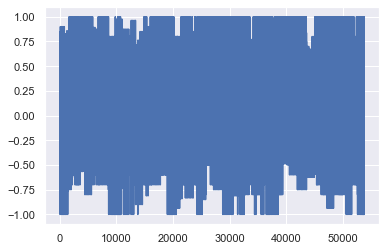

In [59]:
plt.plot(df1['sentiment_Score'])

In [60]:
df_1 = pd.get_dummies(df1['categoryId'])
df_1.head()

,Entertainment,FilmCategory,Life,Other
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1


In [61]:
df_f = pd.concat([df1, df_1], axis=1)

In [62]:
df_f.columns

Index(['title', 'categoryId', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'title_tags', 'sentiment_Score', 'Entertainment',
       'FilmCategory', 'Life', 'Other'],
      dtype='object')

In [63]:
df_f.drop([ 'title', 'categoryId', 'tags', 'view_count', 'likes','dislikes', 'comment_count', 'title_tags'],axis=1,inplace=True)

In [64]:
df_f['Succes_ration'] = (df1['likes']+df1['comment_count'])/df1['view_count'] 

In [65]:
def succes_r(col):
    if col>=0.035:
        return 1
    else :
        return 0

In [66]:
df_f['Succes_ration'] = df_f['Succes_ration'].apply(succes_r)


In [67]:
df_f.head()

,sentiment_Score,Entertainment,FilmCategory,Life,Other,Succes_ration
0,0.250000,0,0,1,0,1
1,-0.045455,0,0,0,1,1
2,0.154545,1,0,0,0,1
3,-0.125000,1,0,0,0,1
4,0.262500,0,0,0,1,1


In [68]:
from sklearn.cluster import KMeans

In [72]:
err = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_f.iloc[:,0:5])
    err.append(kmeans.inertia_)
        
    

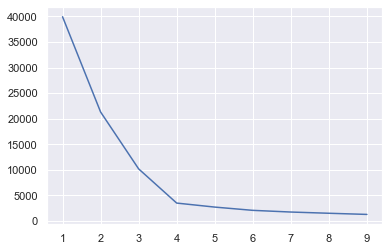

In [73]:
plt.plot(range(1,10), err)

In [74]:
kmeans = KMeans(n_clusters=4)
df_f['cluster'] = kmeans.fit_predict(df_f)
df_f.head()

,sentiment_Score,Entertainment,FilmCategory,Life,Other,Succes_ration,cluster
0,0.250000,0,0,1,0,1,2
1,-0.045455,0,0,0,1,1,1
2,0.154545,1,0,0,0,1,0
3,-0.125000,1,0,0,0,1,0
4,0.262500,0,0,0,1,1,1


In [83]:
t = df_f.groupby('cluster').mean()
t.head()

,sentiment_Score,Entertainment,FilmCategory,Life,Other,Succes_ration
cluster,,,,,,
0,0.082567,1,0,0,0,0.780097
1,0.077678,0,0,0,1,0.577886
2,0.121401,0,0,1,0,0.860354
3,0.046507,0,1,0,0,0.597607


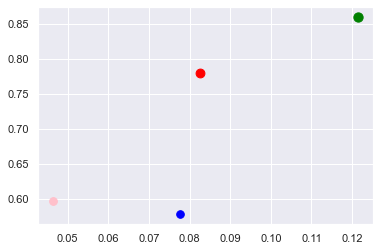

In [88]:
plt.scatter(t.loc[0]['sentiment_Score'],t.loc[0]['Succes_ration'], s=t.loc[0]['Succes_ration']*100, c='red')
plt.scatter(t.loc[1]['sentiment_Score'],t.loc[1]['Succes_ration'],s=t.loc[1]['Succes_ration']*100, c='blue')
plt.scatter(t.loc[2]['sentiment_Score'],t.loc[2]['Succes_ration'],s=t.loc[2]['Succes_ration']*100, c='green')
plt.scatter(t.loc[3]['sentiment_Score'],t.loc[3]['Succes_ration'],s=t.loc[3]['Succes_ration']*100, c='pink')
plt.show()

In [ ]:
plt.scatter()